<a href="https://colab.research.google.com/github/JoseTobon/AI_Notebooks/blob/main/CalistaAesthetics_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calista-AI**
Usage of pretrained models

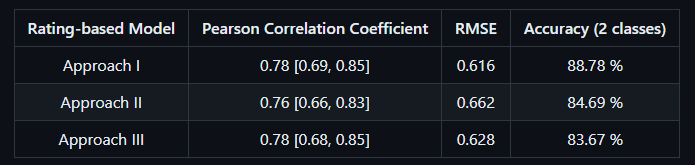


In [ ]:
# Cloning of repo
!git clone https://github.com/calista-ai/website-aesthetics-research.git

# Downloading of datasets
!cd website-aesthetics-research/ && git submodule update --init

Cloning into 'website-aesthetics-research'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 100 (delta 38), reused 80 (delta 23), pack-reused 0
Receiving objects: 100% (100/100), 35.12 KiB | 1.40 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Submodule 'datasets' (https://github.com/calista-ai/website-aesthetics-datasets.git) registered for path 'datasets'
Cloning into '/content/website-aesthetics-research/datasets'...
Submodule path 'datasets': checked out '276babac8308628f47e17d6e64feda9f23d89276'


## **Rating-based approach I**

Description: In this approach, the model was trained using the mean value of the user ratings for each website. The model's output is an aesthetics score on the scale 1-9.

Transfer-learning: Flickr-Style was used as a base network

In [ ]:
# Get Gdown for downloading large drive files
!pip install gdown
# Donwload of pretrained model based on approach 1

!cd website-aesthetics-research/pretrained-models/ && gdown https://drive.google.com/uc?id=14YD5aNajaJDU9cCVNdz9KLbupO9pVcpT -O flickr_style.h5

Downloading...
From (original): https://drive.google.com/uc?id=14YD5aNajaJDU9cCVNdz9KLbupO9pVcpT
From (redirected): https://drive.google.com/uc?id=14YD5aNajaJDU9cCVNdz9KLbupO9pVcpT&confirm=t&uuid=73c00daa-3b88-40af-80f3-32ab3951d40c
To: /content/website-aesthetics-research/pretrained-models/flickr_style.h5
100% 228M/228M [00:02<00:00, 88.9MB/s]


In [ ]:
# Installation of dependencies
!pip install -r website-aesthetics-research/requirements.txt

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==1.14.0


Import training and testing data.

{train, test}_images: contains the path of each image

{train, test}_scores: contains the user ratings of each image

In [ ]:
import csv

data_folder = 'website-aesthetics-research/datasets/rating-based-dataset/preprocess/'

train_data_path = data_folder + 'train_means_list.csv'
test_data_path = data_folder + 'test_list.csv'
images_path = data_folder + 'resized'

def get_scores(scores_path):

    images = []
    scores = []

    with open(scores_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0

        for row in csv_reader:
            if line_count == 0:

                line_count += 1
            else:

                scores.append(float(row[1]))
                line_count += 1
                image_name = row[0]

                images.append(images_path + image_name)

    return (images, scores)

train_images, train_scores = get_scores(train_data_path)
test_images, test_scores = get_scores(test_data_path)

In [ ]:
# Shuffle the training data

import random
import numpy as np

# np.random.seed(2000)

temp = list(zip(train_images, train_scores))
random.shuffle(temp)

train_images, train_scores = zip(*temp)

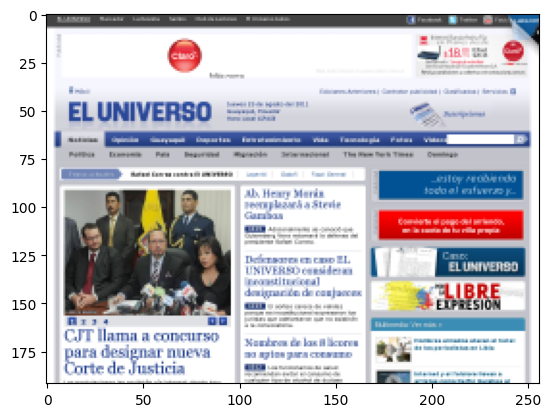

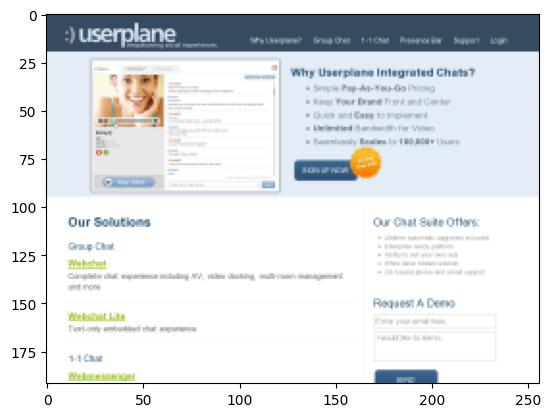

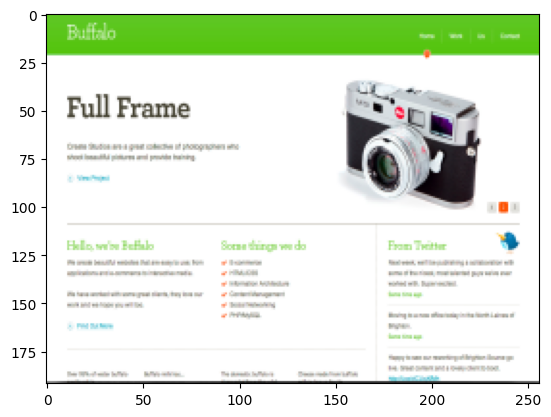

In [ ]:
# Displaying images

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mping
for ima in train_images[0:3]:
  img = mping.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [ ]:
# Transform to numpy arrays

import cv2

width = 256
height = 192
channels = 3

def read_and_process_images(list_of_images):
  X = []

  for image in list_of_images:

    # images are already resized
    # X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (width, height),
    #                     interpolation=cv2.INTER_AREA))

    X.append(cv2.imread(image, cv2.IMREAD_COLOR))

  return X


X_train = np.array(read_and_process_images(train_images))
y_train = np.array(train_scores)

X_val = np.array(read_and_process_images(test_images))
y_val = np.array(test_scores)


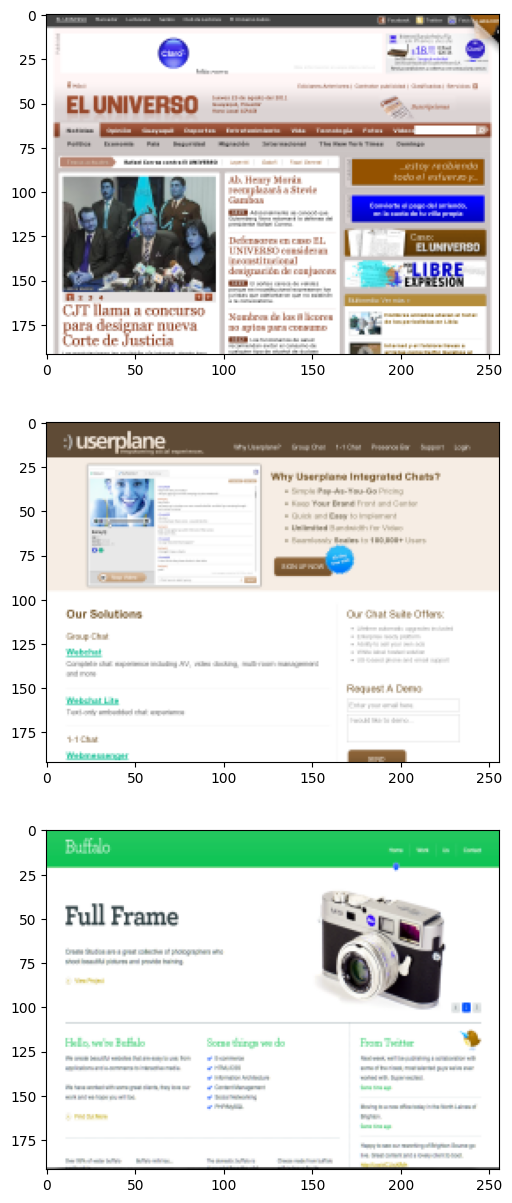

In [ ]:
plt.figure(figsize=(25,15))
columns = 3

for i in range(columns):
  plt.subplot(columns, 1, i+1)
  plt.imshow(X_train[i])

In [ ]:
ntrain = len(X_train)
nval = len(X_val)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_val is: ', X_val.shape)
print('Shape of y_train is: ', y_train.shape)
print('Shape of y_val is: ', y_val.shape)

Shape of X_train is:  (300, 192, 256, 3)
Shape of X_val is:  (98, 192, 256, 3)
Shape of y_train is:  (300,)
Shape of y_val is:  (98,)


Get weights from previously downloaded pre-trained model (flickr style)

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import h5py

def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf_file, 'r') as f:
        for path, _ in h5py_dataset_iterator(f):
            yield path

weights = {}
filename = 'website-aesthetics-research/pretrained-models/flickr_style.h5'

with h5py.File(filename, 'r') as f:
    for dset in traverse_datasets(filename):
        print('Path:', dset)
        # print('Shape:', f[dset].shape)
        # print('Data type:', f[dset].dtype)
        weights[dset] = f[dset][:]

conv1_bias = weights['/conv1/conv1/bias:0']
conv1_kernel = weights['/conv1/conv1/kernel:0']
conv2_bias = weights['/conv2/conv2/bias:0']
conv2_kernel = weights['/conv2/conv2/kernel:0']
conv3_bias = weights['/conv3/conv3/bias:0']
conv3_kernel = weights['/conv3/conv3/kernel:0']
conv4_bias = weights['/conv4/conv4/bias:0']
conv4_kernel = weights['/conv4/conv4/kernel:0']
conv5_bias = weights['/conv5/conv5/bias:0']
conv5_kernel = weights['/conv5/conv5/kernel:0']

Path: /conv1/conv1/bias:0
Path: /conv1/conv1/kernel:0
Path: /conv2/conv2/bias:0
Path: /conv2/conv2/kernel:0
Path: /conv3/conv3/bias:0
Path: /conv3/conv3/kernel:0
Path: /conv4/conv4/bias:0
Path: /conv4/conv4/kernel:0
Path: /conv5/conv5/bias:0
Path: /conv5/conv5/kernel:0
Path: /fc6/fc6/bias:0
Path: /fc6/fc6/kernel:0
Path: /fc7/fc7/bias:0
Path: /fc7/fc7/kernel:0
Path: /fc8_flickr/fc8_flickr/bias:0
Path: /fc8_flickr/fc8_flickr/kernel:0


The architecture that will be used for the CNN is CaffeNet. First, we define the LRN (Local Response Normalization) layer.

In [ ]:
# from keras.layers.core import Layer
from tensorflow.keras.layers import Layer
from keras import backend as K

class LRN(Layer):

    def __init__(self, n=5, alpha=0.0001, beta=0.75, k=2, **kwargs):
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.k = k
        super(LRN, self).__init__(**kwargs)

    def build(self, input_shape):
        self.shape = input_shape
        super(LRN, self).build(input_shape)

    def call(self, x, mask=None):
        if K.image_data_format == "th":
            _, f, r, c = self.shape
        else:
            _, r, c, f = self.shape
        half_n = self.n // 2
        squared = K.square(x)
        pooled = K.pool2d(squared, (half_n, half_n), strides=(1, 1),
                         padding="same", pool_mode="avg")
        if K.image_data_format == "th":
            summed = K.sum(pooled, axis=1, keepdims=True)
            averaged = (self.alpha / self.n) * K.repeat_elements(summed, f, axis=1)
        else:
            summed = K.sum(pooled, axis=3, keepdims=True)
            averaged = (self.alpha / self.n) * K.repeat_elements(summed, f, axis=3)
        denom = K.pow(self.k + averaged, self.beta)
        return x / denom

    def get_output_shape_for(self, input_shape):
        return input_shape

In [ ]:
# Construction of the CNN

l = 0.001 # weight decay

input_shape = (192, 256, 3)

im_data = layers.Input(shape=input_shape, dtype='float32', name='im_data')

conv1 = layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), name='conv1',
                        activation='relu', input_shape=input_shape,
                        kernel_regularizer=regularizers.l2(l))(im_data)

pool1 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)
norm1 = LRN(name="norm1")(pool1)
drop1 = layers.Dropout(0.1)(norm1)

layer1_1 = layers.Lambda(lambda x: x[:, :, :, :48])(drop1)
layer1_2 = layers.Lambda(lambda x: x[:, :, :, 48:])(drop1)

conv2_1 = layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv2_1',
                        kernel_regularizer=regularizers.l2(l))(layer1_1)

conv2_2 = layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv2_2',
                        kernel_regularizer=regularizers.l2(l))(layer1_2)

conv2 = layers.Concatenate(name='conv_2')([conv2_1, conv2_2])

pool2 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv2)
norm2 = LRN(name="norm2")(pool2)
drop2 = layers.Dropout(0.1)(norm2)

conv3 = layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                        name='conv3',
                        padding='same',
                        kernel_regularizer=regularizers.l2(l))(drop2)
drop3 = layers.Dropout(0.1)(conv3)

layer3_1 = layers.Lambda(lambda x: x[:, :, :, :192])(drop3)
layer3_2 = layers.Lambda(lambda x: x[:, :, :, 192:])(drop3)

conv4_1 = layers.Conv2D(192, kernel_size=(3, 3), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv4_1',
                        kernel_regularizer=regularizers.l2(l))(layer3_1)

conv4_2 = layers.Conv2D(192, kernel_size=(3, 3), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv4_2',
                        kernel_regularizer=regularizers.l2(l))(layer3_2)

conv4 = layers.Concatenate(name='conv_4')([conv4_1, conv4_2])

layer4_1 = layers.Lambda(lambda x: x[:, :, :, :192])(conv4)
layer4_2 = layers.Lambda(lambda x: x[:, :, :, 192:])(conv4)

conv5_1 = layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv5_1',
                        kernel_regularizer=regularizers.l2(l))(layer4_1)

conv5_2 = layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1),
                        activation='relu',
                        padding='same',
                        name='conv5_2',
                        kernel_regularizer=regularizers.l2(l))(layer4_2)

conv5 = layers.Concatenate(name='conv_5')([conv5_1, conv5_2])

pool5 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv5)

flat = layers.Flatten()(pool5)
fc6 = layers.Dense(1024, activation='relu', name='fc6',
                        kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01),
                        bias_initializer='zeros',
                        kernel_regularizer=regularizers.l2(l))(flat)
drop6 = layers.Dropout(0.5)(fc6)

fc7 = layers.Dense(512, activation='relu', name='fc7',
                        kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01),
                        bias_initializer='zeros',
                        kernel_regularizer=regularizers.l2(l))(drop6)
drop7 = layers.Dropout(0.5)(fc7)

fc8 = layers.Dense(1, name='fc8',
                        kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01),
                        bias_initializer='zeros')(drop7)

model = models.Model(inputs=im_data, outputs=fc8)

In [ ]:
# Initialize the weights of the first 5 convolutional layers of the model with the weights of the pretrained model.
model.get_layer('conv1').set_weights([conv1_kernel[:, :, :, :], conv1_bias[:]])
model.get_layer('conv2_1').set_weights([conv2_kernel[:, :, :, :128], conv2_bias[:128]])
model.get_layer('conv2_2').set_weights([conv2_kernel[:, :, :, 128:], conv2_bias[128:]])
model.get_layer('conv3').set_weights([conv3_kernel[:, :, :, :], conv3_bias[:]])
model.get_layer('conv4_1').set_weights([conv4_kernel[:, :, :, :192], conv4_bias[:192]])
model.get_layer('conv4_2').set_weights([conv4_kernel[:, :, :, 192:], conv4_bias[192:]])
model.get_layer('conv5_1').set_weights([conv5_kernel[:, :, :, :128], conv5_bias[:128]])
model.get_layer('conv5_2').set_weights([conv5_kernel[:, :, :, 128:], conv5_bias[128:]])


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 im_data (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 46, 62, 96)           34944     ['im_data[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 23, 31, 96)           0         ['conv1[0][0]']               
 D)                                                                                               
                                                                                                  
 norm1 (LRN)                 (None, 23, 31, 96)           0         ['max_pooling2d[0][0]']   

In [ ]:
from keras import backend as K

def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def euclidean_distance_loss(y_true, y_pred):
    return 0.5 * K.mean(K.square(y_pred - y_true), axis=-1)


In [ ]:

batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)


In [ ]:
# Compile the model

import tensorflow


epochs = 95
decay = 1e-4
base_lr = 0.001

sgd = tensorflow.optimizers.legacy.SGD(lr=base_lr, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss=euclidean_distance_loss , optimizer=sgd, metrics=[rmse])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# TRAINING!

history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain // batch_size,
                             epochs = epochs,
                             validation_data=val_generator,
                             validation_steps=nval // batch_size)


<ipython-input-17-d5edb26bc402>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/95
9/9 [==============================] - 16s 388ms/step - loss: 11.5090 - rmse: 4.2616 - val_loss: 10.8842 - val_rmse: 4.1365
Epoch 2/95
9/9 [==============================] - 1s 75ms/step - loss: 10.5732 - rmse: 4.0342 - val_loss: 9.7717 - val_rmse: 3.8533
Epoch 3/95
9/9 [==============================] - 1s 59ms/step - loss: 9.3107 - rmse: 3.7085 - val_loss: 8.6009 - val_rmse: 3.5364
Epoch 4/95
9/9 [==============================] - 1s 58ms/step - loss: 8.2129 - rmse: 3.3935 - val_loss: 7.4554 - val_rmse: 3.1961
Epoch 5/95
9/9 [==============================] - 1s 62ms/step - loss: 7.0753 - rmse: 3.0421 - val_loss: 6.4660 - val_rmse: 2.8700
Epoch 6/95
9/9 [==============================] - 1s 56ms/step - loss: 5.9301 - rmse: 2.6525 - val_loss: 5.0229 - val_rmse: 2.3276
Epoch 7/95
9/9 [==============================] - 1s 61ms/step - loss: 3.5295 - rmse: 1.5138 - val_loss: 2.3580 - val_rmse: 0.7866
Epoch 8/95
9/9 [==============================] - 1s 57ms/step - loss: 2.5265 

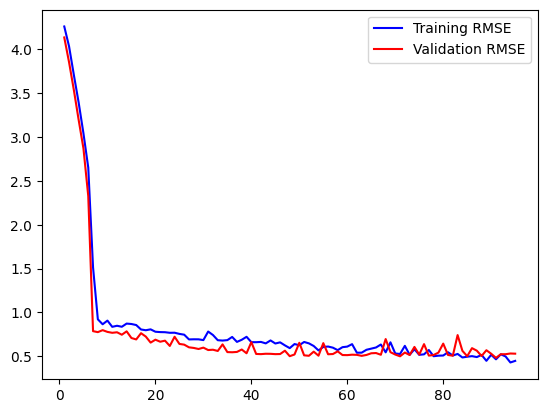

In [ ]:
# Displaying learning curve

rmse = history.history["rmse"]
val_rmse = history.history["val_rmse"]

epochs_x = range(1, len(rmse) + 1)

plt.plot(epochs_x, rmse, 'b', label='Training RMSE')
plt.plot(epochs_x, val_rmse, 'r', label='Validation RMSE')

plt.legend()




In [ ]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    N = len(x)
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(N-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [ ]:
# To predict scores on the first 10 images
predictions = []

X_val = X_val / 255.0
for img in X_val:
  img = img.reshape(1, 192, 256, 3)
  pred = model.predict(img)
  predictions.append(float(pred))

predictions = np.array(predictions)

1/1 [==============================] - 0s 22ms/step


<ipython-input-21-d3579f97db98>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions.append(float(pred))


1/1 [==============================] - 0s 21ms/step


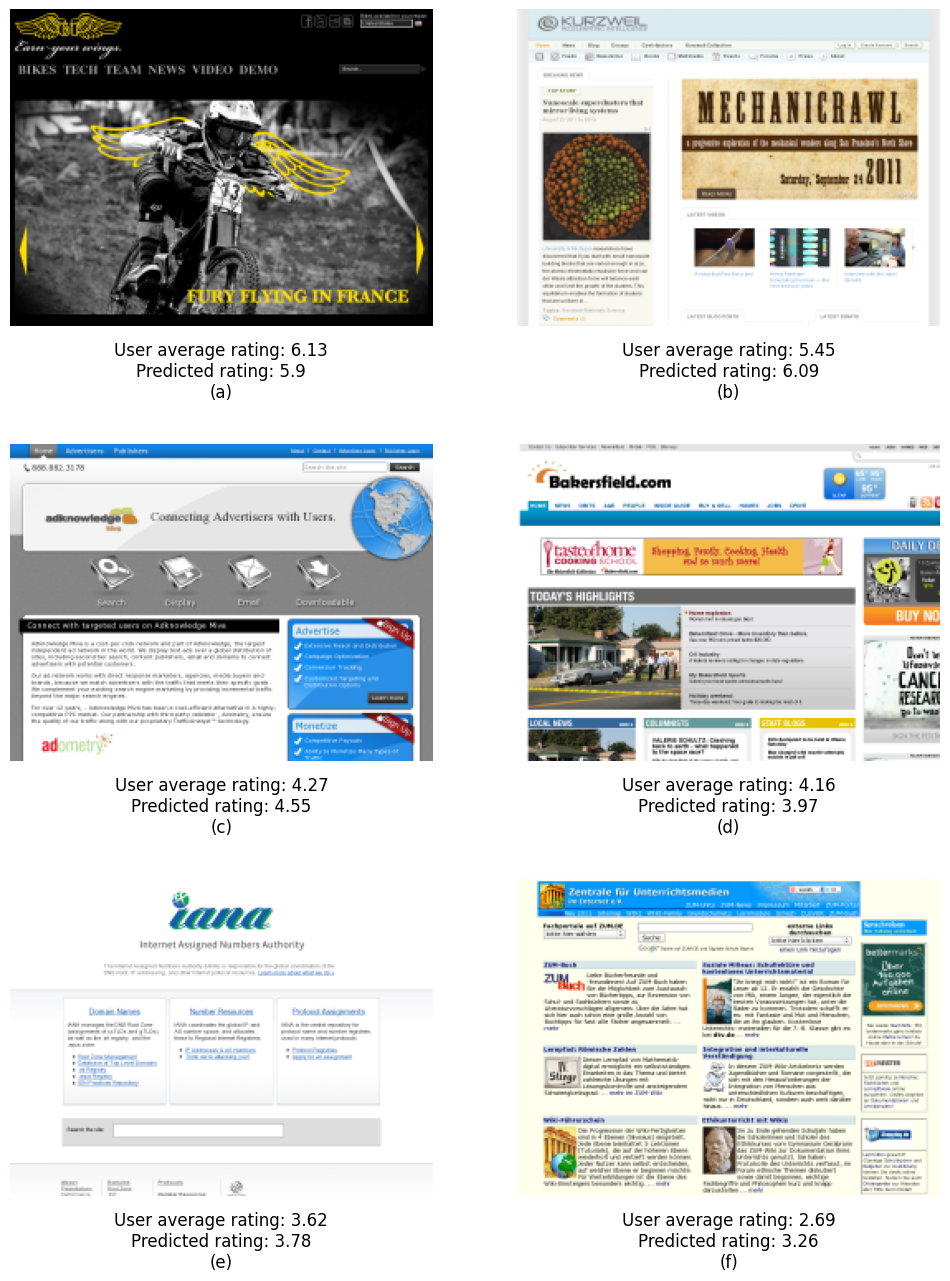

In [ ]:
image_ids = [87, 45, 49, 94, 14, 83] # test image IDs sorted in descending order according to the website's aesthetics level

fig = plt.figure(figsize=(12, 16))
i = 1
for id in image_ids:
  if 'english' in test_images[id]:
    path = images_path + '/english_resized/' + test_images[id].rsplit('/', 1)[1]
  else:
    path = images_path + '/foreign_resized/' + test_images[id].rsplit('/', 1)[1]

  plt.subplot(len(image_ids)//2, 2, i)
  img = mping.imread(path)
  plt.title('User average rating: ' + str(np.round(y_val[id],2)) + '\nPredicted rating: ' + str(np.round(predictions[id],2)) + '\n(' + chr(97+i-1) + ')', y=-0.25)
  plt.axis('off')
  plt.imshow(img)

  i += 1

plt.show()

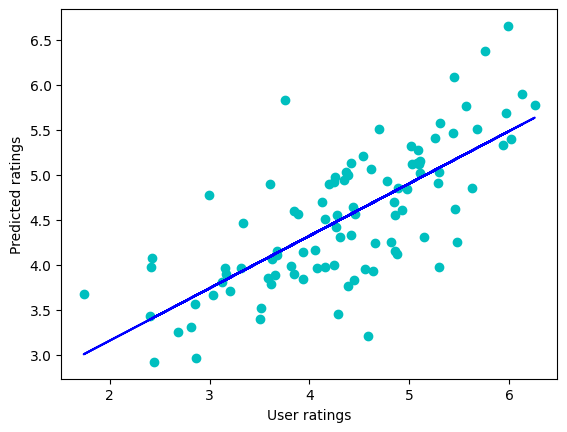

In [ ]:
# Scatter plot for groundtruth and the predictions

from numpy.polynomial.polynomial import polyfit
b, m = polyfit(y_val, predictions, 1)

fig = plt.figure()
plt.scatter(y_val, predictions, c='c')
plt.plot(y_val, b + m * y_val, '-', c='b')
plt.xlabel('User ratings')
plt.ylabel('Predicted ratings')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

corr, p, lo, hi = pearsonr_ci(y_val, predictions)
print('Pearsons correlation: r=%.2f, p=%.2e, CI=[%.2f, %.2f]' % (corr, p, lo, hi))
rmse_test = sqrt(mean_squared_error(y_val, predictions))
print('RMSE: %.3f' % rmse_test)


Pearsons correlation: r=0.73, p=1.35e-17, CI=[0.62, 0.81]
RMSE: 0.683


<ipython-input-26-ee36748be43b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, bins=bins, label='User ratings')
<ipython-input-26-ee36748be43b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, bins=bins, label='Predicted ratings')


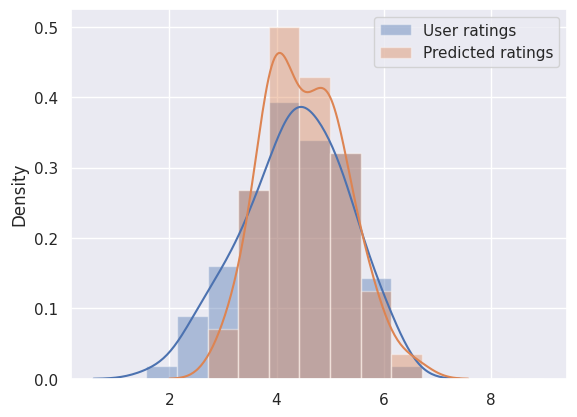

In [ ]:
import seaborn as sns

fig = plt.figure()
sns.set(color_codes=True)

bins = np.linspace(1, 9, num=15)

sns.distplot(y_val, bins=bins, label='User ratings')

sns.distplot(predictions, bins=bins, label='Predicted ratings')

plt.legend()

plt.show()


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

In [ ]:
# Importa la función VizGradCam
from gradcam import VizGradCam

# Carga tu imagen favorita
test_img = img_to_array(load_img(image_ids[87], target_size=(224, 224)))

# Usa la función VizGradCam con tu modelo
VizGradCam(model, test_img)

ModuleNotFoundError: No module named 'gradcam'